### Linear Regression

epoch: 10, loss = 4386.1880
epoch: 20, loss = 3270.5710
epoch: 30, loss = 2463.9917
epoch: 40, loss = 1880.1891
epoch: 50, loss = 1457.1921
epoch: 60, loss = 1150.4115
epoch: 70, loss = 927.7189
epoch: 80, loss = 765.9333
epoch: 90, loss = 648.3071
epoch: 100, loss = 562.7280


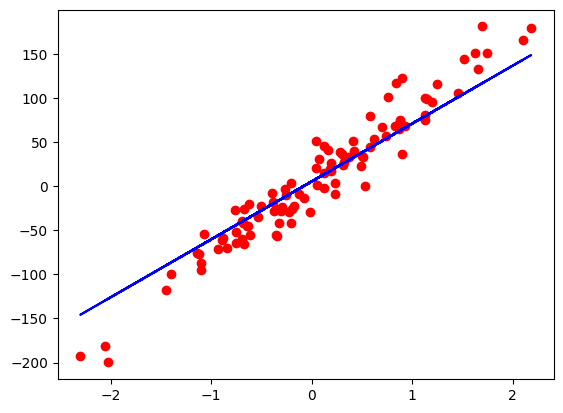

In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0)Prepare Data
X_numpy,y_numpy=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)

x=torch.from_numpy(X_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))
y=y.view(y.shape[0],1) # col vector

n_samples,n_features=x.shape

# 1)Model
input_size=n_features
output_size=1
model=nn.Linear(input_size,output_size)

# 2)loss and optimizer
learning_rate=0.01
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

# 3)Training loop
num_epochs=100
for epoch in range(num_epochs):
    # Forward Pass and loss
    y_predicted=model(x)
    loss=criterion(y_predicted,y)

    # backward pass
    loss.backward()

    # update
    optimizer.step()

    optimizer.zero_grad()

    if (epoch+1)%10==0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


# plot
predicted = model(x).detach().numpy()
plt.plot(X_numpy,y_numpy,'ro')
plt.plot(X_numpy,predicted,'b')
plt.show()